In [1]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/resultBaseLine/advBIM_ratio'
idx_code = 1

resDir = '/egr/research-aidd/menghan1/AnchorDrug/resultBaseLine/advbim_dist'
idx_code = 2

files = [f for f in os.listdir(resDir) if f.endswith('balancesample.csv')]
querys = list(set([f.split('_')[5] for f in files]))
eps = [float(q.split('-')[idx_code]) for q in querys]
querys = [x for _, x in sorted(zip(eps, querys))]
print(querys)

['AdversarialBIM-0.85-0.5-0.001', 'AdversarialBIM-0.85-0.6-0.001', 'AdversarialBIM-0.85-0.7-0.001', 'AdversarialBIM-0.85-0.8-0.001', 'AdversarialBIM-0.85-0.9-0.001']


A549
          acc        f1
0.5  0.723208  0.584363
0.6  0.730531  0.585543
0.7  0.718980  0.582396
0.8  0.727736  0.583840
0.9  0.721025  0.582608
MCF7
          acc        f1
0.5  0.695099  0.564439
0.6  0.697474  0.560939
0.7  0.693600  0.558872
0.8  0.697927  0.558645
0.9  0.694897  0.558378
PC3
          acc        f1
0.5  0.728902  0.574017
0.6  0.733061  0.577849
0.7  0.730496  0.574680
0.8  0.733831  0.573735
0.9  0.718306  0.569635


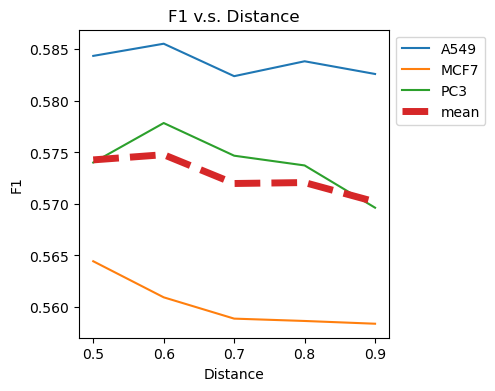

In [3]:
y = [0]*7
y = [0]*5

celllist = ['A549', 'MCF7', 'PC3']
fig, ax = plt.subplots(1,1, figsize=(4,4))
for c in celllist:
    print(c)
    filesc = [f for f in files if c in f]
    # [print(fq) for fq in filesc]
    f1_all, precision_all, recall_all = [],[],[]
    df_c = pd.DataFrame()
    for q in querys:
        fqc = [f for f in filesc if q in f][0]
        # print(q)
        df = pd.read_csv(f'{resDir}/{fqc}', index_col=0)
        # print(df)
        # print(df.mean(1))
        df_c[float(q.split('-')[idx_code])] = df.mean(1)
        # print(df.T.to_numpy().mean(0))
        # print(df.T.to_numpy().std(0))
    # print(df_c.index)
    print(df_c.loc[['acc', 'f1']].T)
    # df_c.T.to_csv(f'{resDir}/all_summary_{c}.csv')
    y = [df_c.T.f1.to_list()[i] + y[i] for i in range(len(y))]
    x = df_c.T.index.to_list()
    ax.plot(df_c.T.index.to_list(), df_c.T.f1.to_list(), label=c)
ax.plot(x, [e/3 for e in y], '--', label='mean', linewidth=5.0)
plt.legend(bbox_to_anchor=(1, 1))


plt.title('F1 v.s. Ratio')
plt.xlabel('Ratio')
plt.ylabel('F1')

plt.ylabel('F1')
plt.xlabel('Distance')
plt.title('F1 v.s. Distance')

# fig.tight_layout()
plt.show()